<a href="https://colab.research.google.com/github/mohit6199/CNN-experiments/blob/master/Alexnet_accuracy_vs_learningRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
import numpy as np

# Loads the CIFAR dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display our data shape/dimensions
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
#num_classes = 10
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

index_train=[]
for i in range(0,50000):
    if y_train[i]>5:
        index_train.append(i)
x_train=np.delete(x_train,index_train,0)
y_train=np.delete(y_train,index_train,0)

print('x_train ' , x_train.shape)
print('y_train ', y_train.shape)

index_test=[]
for i in range(0,10000):
    if y_test[i]>5:
        index_test.append(i)
x_test=np.delete(x_test,index_test,0)
y_test=np.delete(y_test,index_test,0)

print('x_test ' , x_test.shape)
print('y_test ', y_test.shape)

#Now we one hot encode outputs
num_classes = 6
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
x_train  (30000, 32, 32, 3)
y_train  (30000, 1)
x_test  (6000, 32, 32, 3)
y_test  (6000, 1)


In [0]:
l2_reg = 0

# Initialize model
model = Sequential()

# 1st Conv Layer 
model.add(Conv2D(128, (7, 7), input_shape=x_train.shape[1:],
    padding='same', kernel_regularizer=l2(l2_reg)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Conv Layer 
model.add(Conv2D(256, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Conv Layer 
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th Conv Layer 
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(1024, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 5th Conv Layer 
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(2048, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 1st FC Layer
model.add(Flatten())
model.add(Dense(3072))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 2nd FC Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 3rd FC Layer
model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

print(model.summary())
















Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       18944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       819456    
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 256)       1024

[0.001  0.0028 0.0046 0.0064 0.0082 0.01  ]
0.001
Train on 30000 samples, validate on 6000 samples
Epoch 1/10
30000/30000 [==============================] - 94s 3ms/step - loss: 0.1629 - acc: 0.9454 - val_loss: 0.7183 - val_acc: 0.7728
Epoch 2/10
30000/30000 [==============================] - 90s 3ms/step - loss: 0.1274 - acc: 0.9595 - val_loss: 0.9016 - val_acc: 0.7293
Epoch 3/10
30000/30000 [==============================] - 90s 3ms/step - loss: 0.1018 - acc: 0.9677 - val_loss: 1.1362 - val_acc: 0.6858
Epoch 4/10
30000/30000 [==============================] - 90s 3ms/step - loss: 0.0819 - acc: 0.9759 - val_loss: 0.7031 - val_acc: 0.8028
Epoch 5/10
30000/30000 [==============================] - 90s 3ms/step - loss: 0.0775 - acc: 0.9759 - val_loss: 0.7434 - val_acc: 0.7887
Epoch 6/10
30000/30000 [==============================] - 90s 3ms/step - loss: 0.0686 - acc: 0.9785 - val_loss: 0.7479 - val_acc: 0.7933
Epoch 7/10
30000/30000 [==============================] - 90s 3ms/step - loss: 

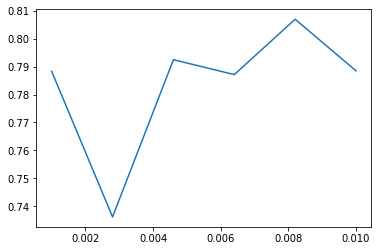

In [0]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
batch_size = 32
epochs = 10
accuracy=[]
learning_rates = np.arange(.001,.01,.0018)
print(learning_rates)
for lr in learning_rates:
  print(lr)
  model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adam(lr),
                metrics = ['accuracy'])
  history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)

  model.save("/content/gdrive/My Drive/VGG/AlexNet-1-CIFAR10_6classes_lr"+str(lr)+".h5")

  # Evaluate the performance of our trained model
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
  accuracy.append(scores[1])
plt.plot(learning_rates,accuracy)
plt.show()

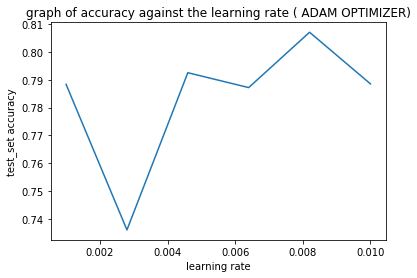

In [0]:
plt.plot(learning_rates,accuracy)
plt.title("graph of accuracy against the learning rate ( ADAM OPTIMIZER)")
plt.xlabel("learning rate")
plt.ylabel("test_set accuracy")
plt.show()